In [3]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [4]:
# 데이터 불러오기
train = pd.read_csv('따릉이/train.csv')# 모델 학습 파일
test = pd.read_csv('따릉이/test.csv')# 모델 시험지 파일
submission = pd.read_csv('따릉이/submission.csv')#답안지 파일 

In [5]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())
train_isna_sum = train.isna().sum()
train_isna_sum[train_isna_sum != 0].index
na_columns = train_isna_sum[train_isna_sum != 0].index
def fill_bicycle_na(df, column) :
    df[column] = df[column].fillna(value = df[column].mean())
fill_bicycle_na(train, 'hour_bef_precipitation')


In [6]:
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [7]:
test_isna_sum = test.isna().sum()
test_na_columns = test_isna_sum[test_isna_sum != 0].index
for col in test_na_columns:
    print(col)
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')
test.isna().sum()

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5
hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [8]:
X_train = train.drop(columns=['count'], axis=1)
y_train = train['count']
X_test = test

In [9]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_target, val_target = train_test_split(X_train, y_train)

In [10]:
import numpy as np

In [14]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [100, 300, 500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}
clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, verbose=1)
clf.fit(train_data, train_target)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=1)

In [15]:
clf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
est = [100, 200, 300, 400]
score = []
test_score = []
for i in est:
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(train_data, train_target)
    score.append(rf.score(train_data, train_target))
    test_score.append(rf.score(val_data, val_target))

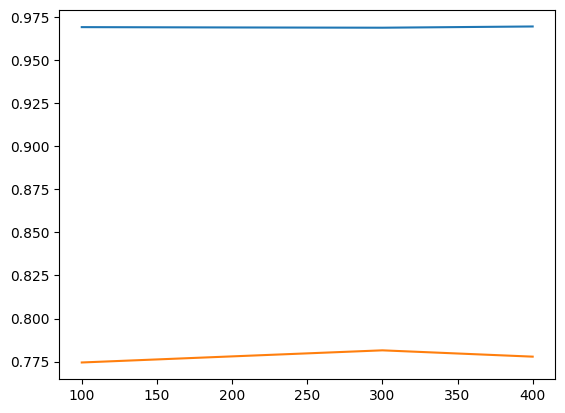

In [ ]:
import matplotlib.pyplot as plt
plt.plot(est, score)
plt.plot(est, test_score)

In [ ]:
random_forest = RandomForestRegressor(n_estimators=300)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [ ]:
predictions = random_forest.predict(X_test)

In [ ]:
submission["count"] = predictions

In [ ]:
submission

,id,count
0,0,95.486667
1,1,231.583333
2,2,84.633333
3,4,29.206667
4,5,70.910000
...,...,...
710,2148,58.616667
711,2149,64.800000
712,2165,122.023333
713,2166,158.463333


In [ ]:
submission.to_csv("따릉이/submission.csv", index=False)